In [1]:
library(Seurat)
library(tidyverse)
library(ggplot2)
library(patchwork)
library(forcats)
library(Polychrome)
library(grid)

Attaching SeuratObject

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [59]:
xenium.obj = qs::qread('230710_xenium_sct_unimapped_cca_polar_label.qs')
xenium.obj

An object of class Seurat 
502 features across 78054 samples within 6 assays 
Active assay: SCT (100 features, 100 variable features)
 5 other assays present: Xenium, BlankCodeword, ControlCodeword, ControlProbe, prediction.score.cell_class
 3 dimensional reductions calculated: umap, cca, ref.umap
 8 spatial fields of view present: fov fov.1 fov.2 fov.3 fov.4 fov.5 fov.6 fov.7

In [60]:
xenium.obj@meta.data = xenium.obj@meta.data %>%
mutate(predicted.polar_label = predicted.polar_label_2s)

In [61]:
rownames(xenium.obj)

[1] "Sorcs1"   "Lingo2"   "Cntn4"    "Tenm2"    "Sox5"     "Ptprd"   
  [7] "Robo1"    "Plcl1"    "Oxr1"     "Plxdc2"   "Plp1"     "Kirrel3" 
 [13] "Mgat4c"   "Tenm3"    "Slit2"    "Nrg3"     "Hdac9"    "Col25a1" 
 [19] "Ncam2"    "Rbfox1"   "Fgf13"    "Pde10a"   "Deptor"   "Alcam"   
 [25] "Gria1"    "Grid2"    "Fam155a"  "Grm7"     "Agrp"     "Naaladl2"
 [31] "Ntm"      "Gpc5"     "Hs3st4"   "Lef1"     "Erbb4"    "Kctd16"  
 [37] "Zfhx3"    "Gtdc1"    "Pdgfra"   "Nrg1"     "Macrod2"  "Gpc6"    
 [43] "Pcdh11x"  "Kcnip4"   "Brinp3"   "Cadm2"    "Pde4b"    "Fhit"    
 [49] "Rgs6"     "Prkg1"    "Dlg2"     "Ptprk"    "Luzp2"    "Ptprt"   
 [55] "Nxph1"    "Kcnq3"    "Lrmda"    "Dcc"      "Cntn5"    "Adarb2"  
 [61] "Gabrg3"   "Rmst"     "Lrp1b"    "Trpm3"    "P3h2"     "Prr16"   
 [67] "Prkca"    "Nrxn3"    "Aqp4"     "Ctnna2"   "Inpp4b"   "Sgcz"    
 [73] "Fat3"     "Plcb1"    "Cacna2d3" "Bmp4"     "Tox"      "Car10"   
 [79] "Nkain2"   "Galntl6"  "Slc7a11"  "Pcdh9"    "Slc1a2"   "Pdzrn3"  
 [85] "Rax"      "Pomc"     "Zfp804b"  "Wwox"     "Pcdh7"    "Grm8"    
 [91] "Rtl4"     "Il1rapl2" "Sgcd"     "Egfem1"   "Arhgap6"  "Immp2l"  
 [97] "Cfap299"  "Htr3b"    "Csmd1"    "Lmx1a"

In [63]:
obj_fgf1 = qs::qread('obj_fgf1_obob5v5.qs')
obj_fgf1

An object of class Seurat 
57395 features across 27188 samples within 3 assays 
Active assay: SCT (25074 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

Warning message:
“ggrepel: 51 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 53 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 52 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


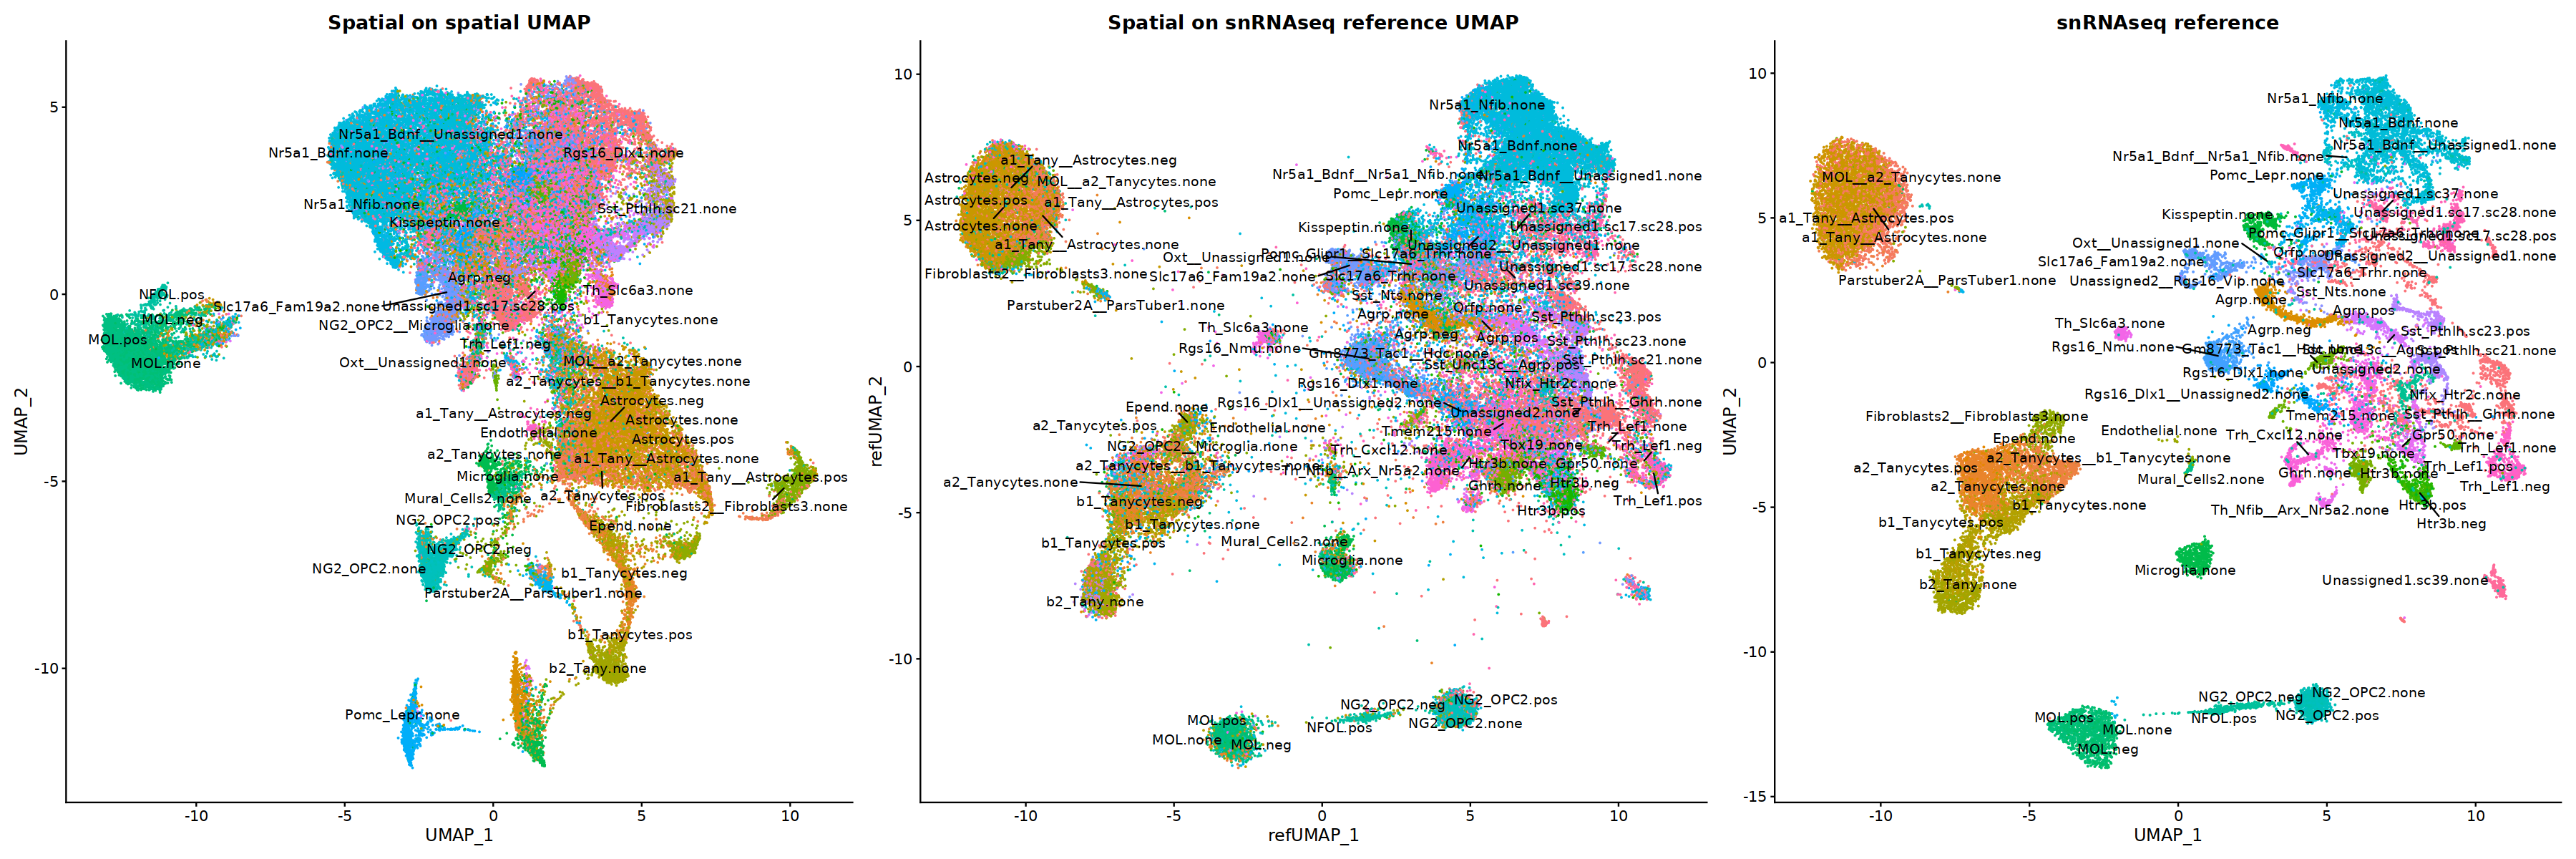

In [64]:
options(repr.plot.width=20, repr.plot.height=20)
p1 = DimPlot(xenium.obj, reduction = "umap", group.by = "predicted.polar_label", label = TRUE, repel = TRUE) + theme(legend.position = "none")  + labs(title = "Spatial on spatial UMAP")
p2 = DimPlot(xenium.obj, reduction = "ref.umap", group.by = "predicted.polar_label", label = TRUE, repel = TRUE) + theme(legend.position = "none") + labs(title = "Spatial on snRNAseq reference UMAP")
p3 = DimPlot(obj_fgf1, reduction = "umap", group.by = "polar_label", label = TRUE, repel = TRUE) + theme(legend.position = "none") + labs(title = "snRNAseq reference")
options(repr.plot.width=30, repr.plot.height=10)
p1 + p2 + p3



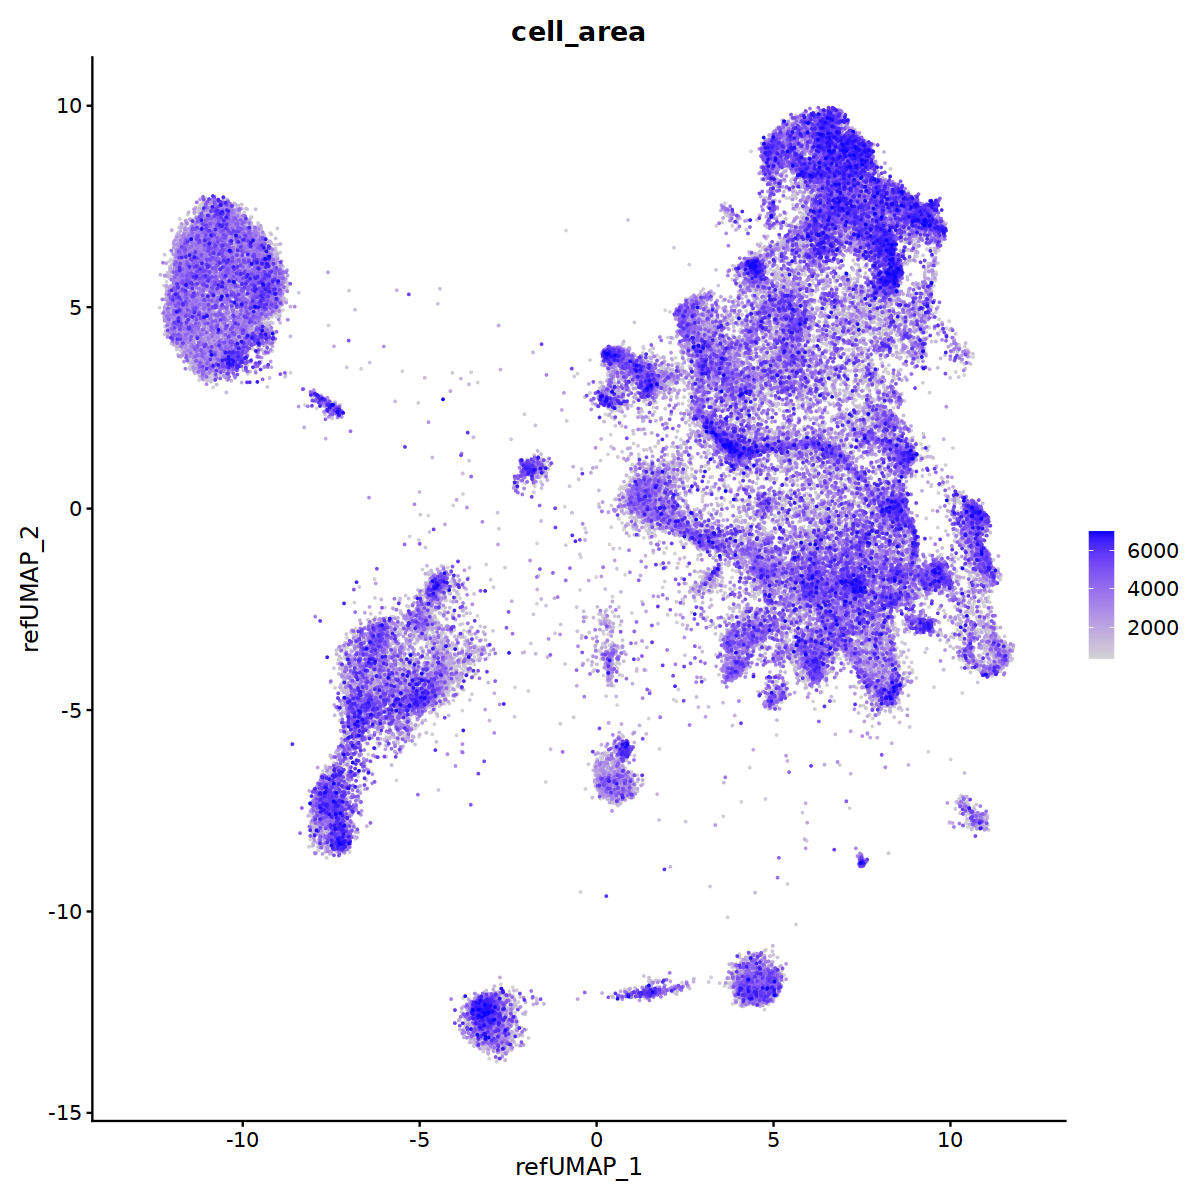

In [65]:
options(repr.plot.width=10, repr.plot.height=10)
FeaturePlot(xenium.obj, c("cell_area"), reduction = "ref.umap", order=TRUE)

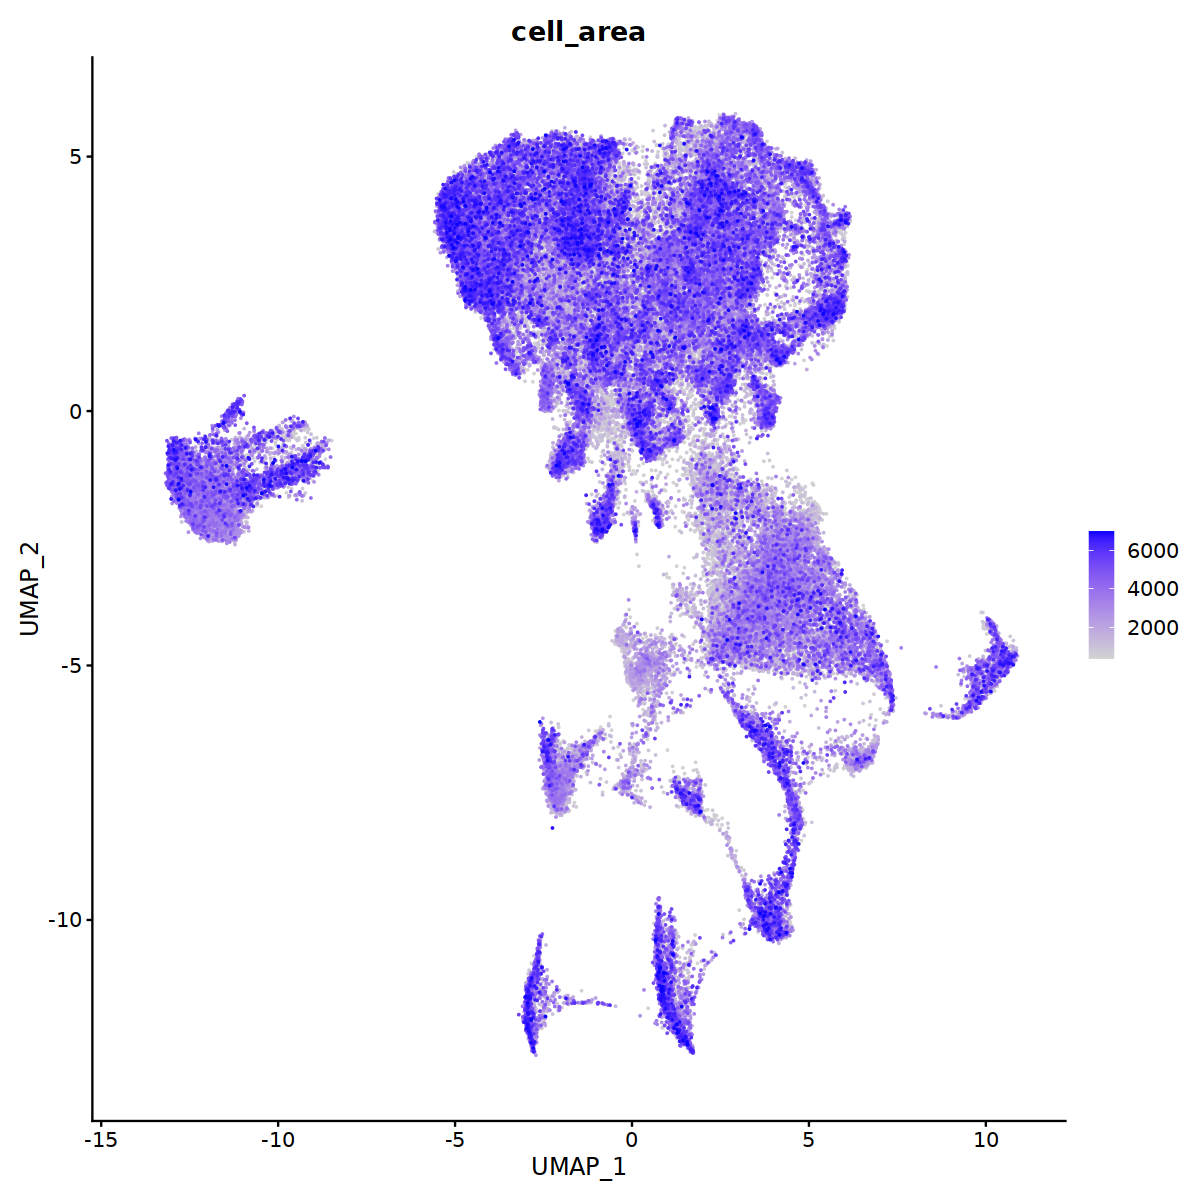

In [66]:
options(repr.plot.width=10, repr.plot.height=10)
FeaturePlot(xenium.obj, c("cell_area"), reduction = "umap", order=TRUE)

Warning message:
“Groups with fewer than two data points have been dropped.”


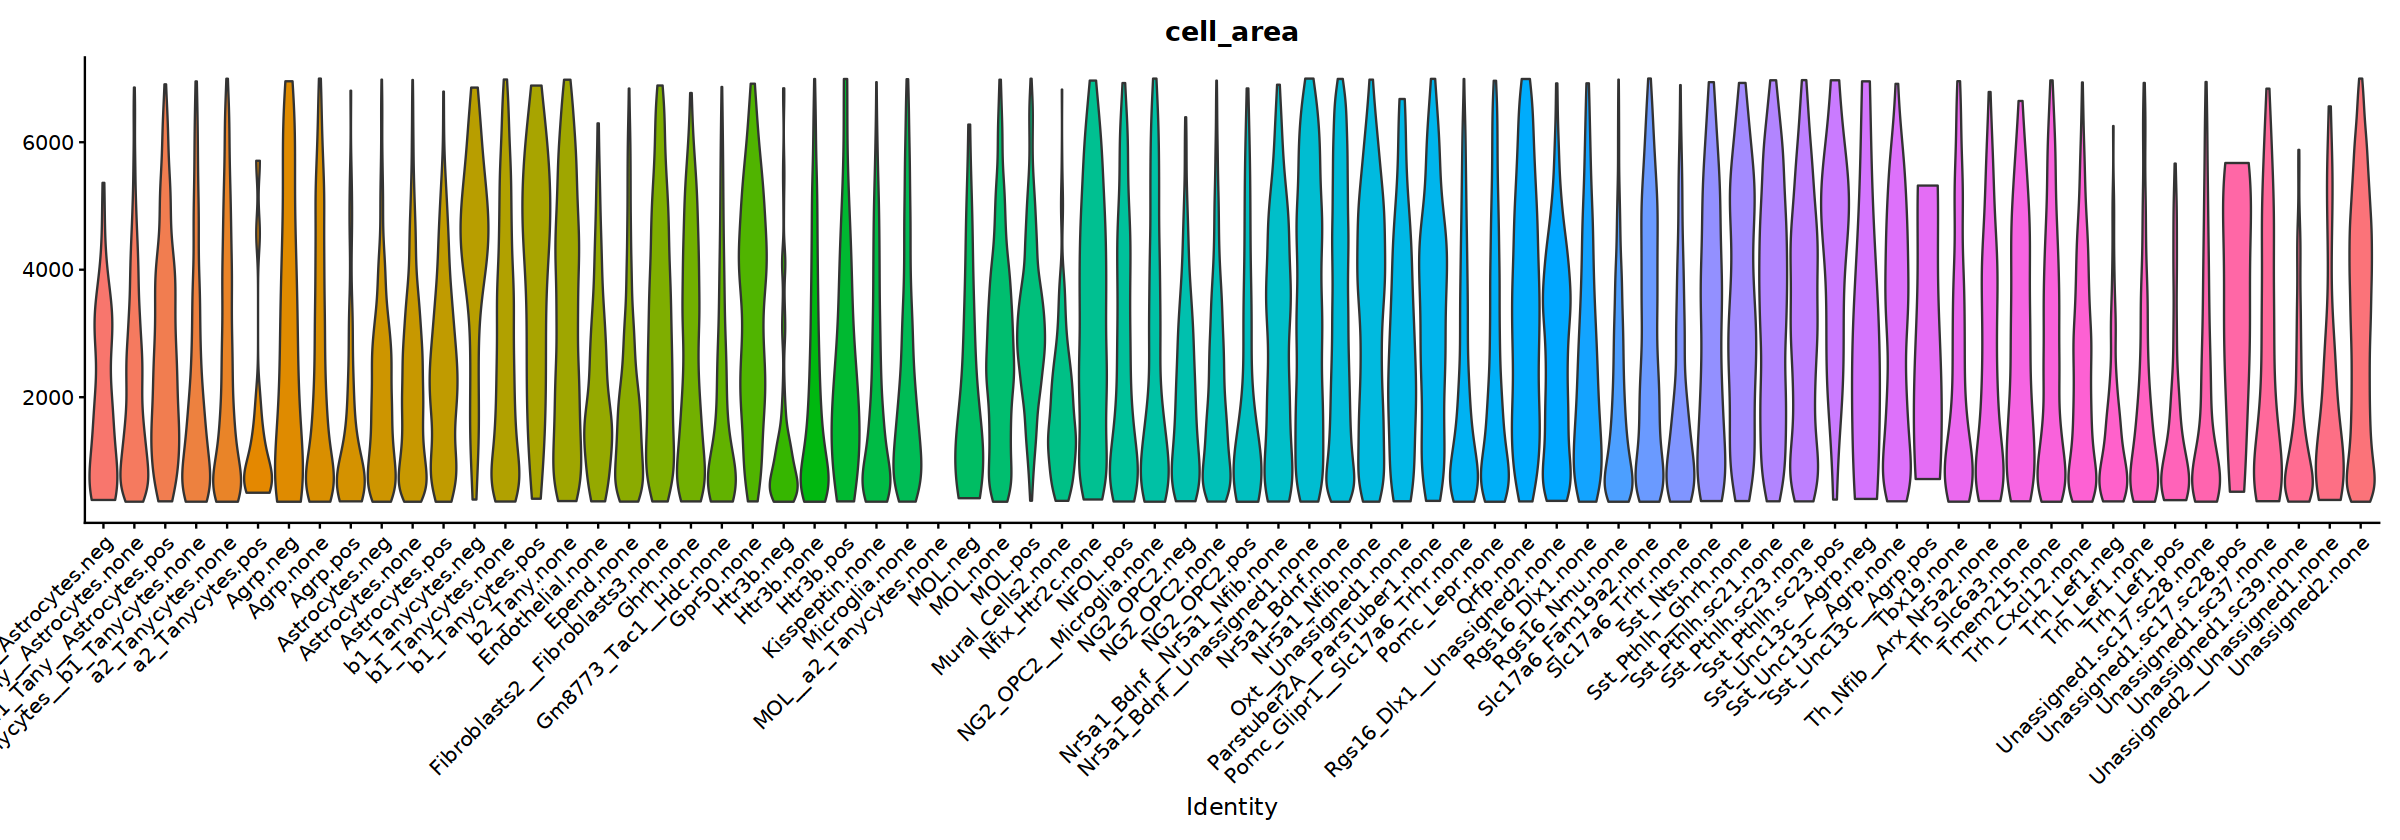

In [67]:
options(repr.plot.width=20, repr.plot.height=7)
VlnPlot(xenium.obj, features = c("cell_area"), pt.size = 0, group.by='predicted.polar_label') + theme(legend.position = "none")

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”


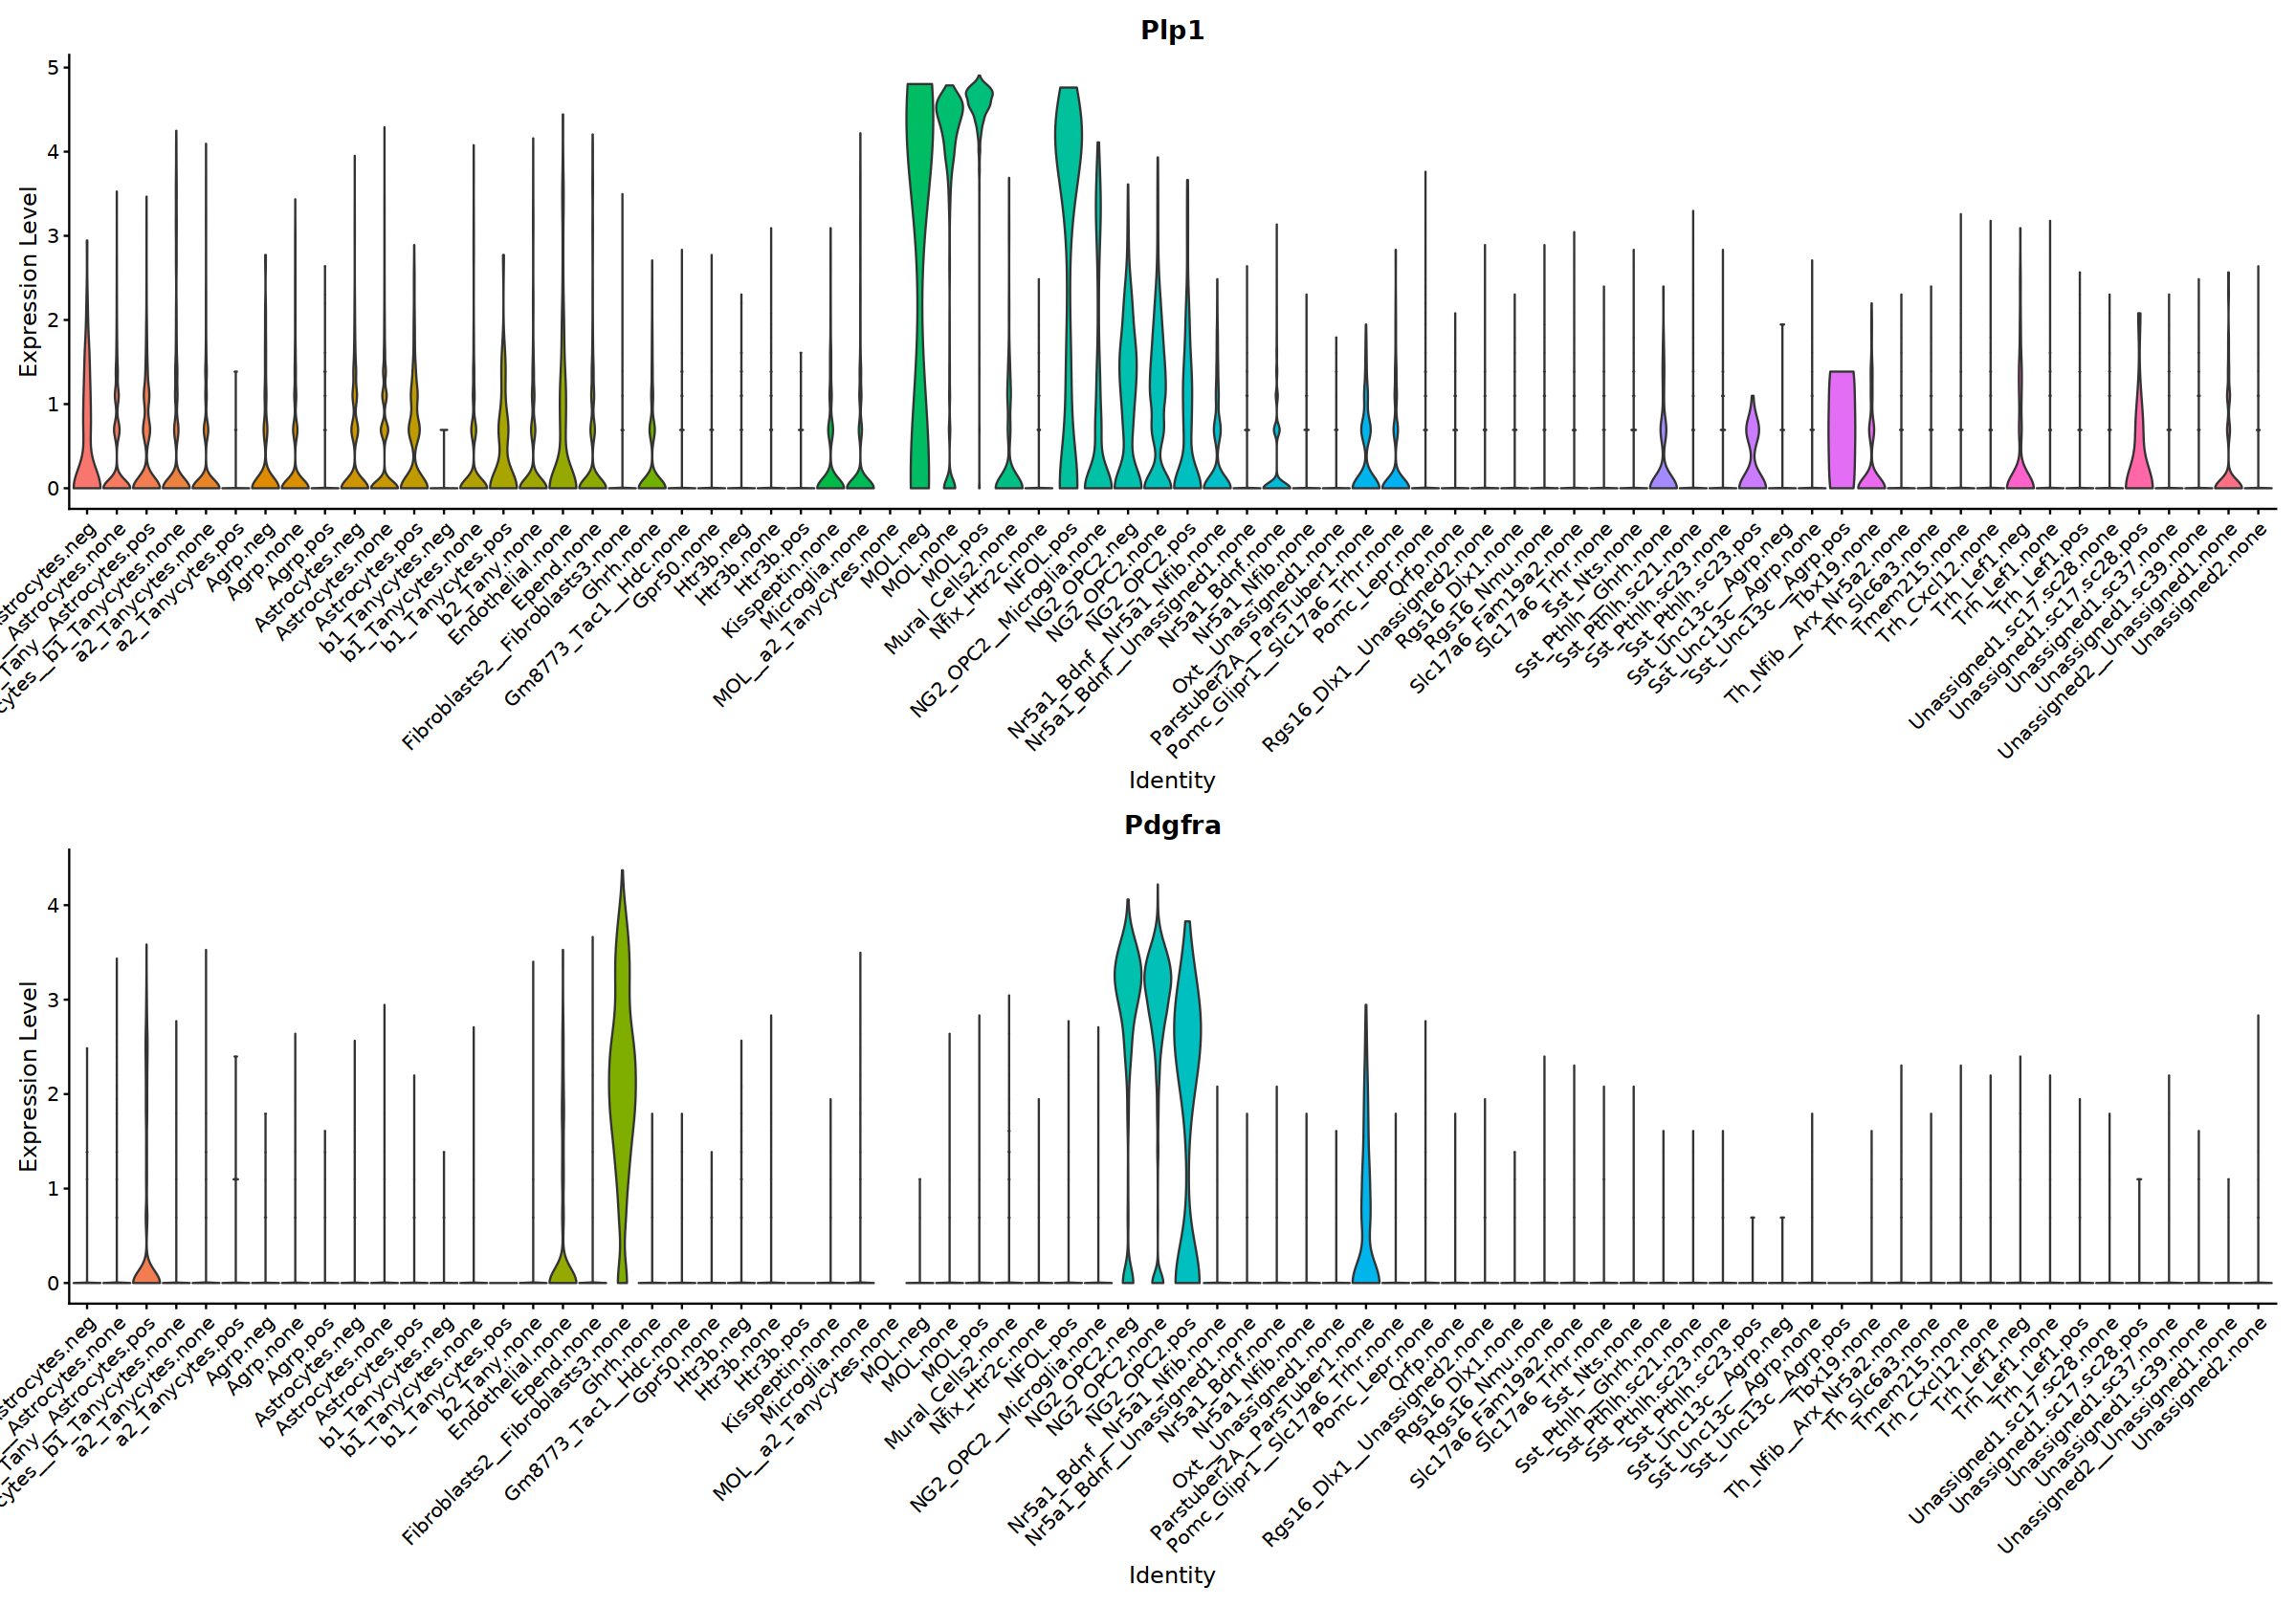

In [68]:
options(repr.plot.width=20, repr.plot.height=14)
VlnPlot(xenium.obj, features = c("Plp1", "Pdgfra"), pt.size = 0, group.by='predicted.polar_label', ncol=1) + theme(legend.position = "none", )

In [69]:
comparison_df = xenium.obj %>% 
`[[` %>%
group_by(treatment, predicted.polar_label) %>%
summarise(n = n()) %>%
pivot_wider(names_from = treatment, values_from = n) %>%
mutate(predicted.label = predicted.polar_label %>% str_replace(fixed('.neg'), '') %>% str_replace(fixed('.none'), '') %>% str_replace(fixed('.pos'), '')) %>%
rowwise %>%
mutate(polarity = str_split(predicted.polar_label, fixed('.')) %>% unlist %>% `[[`(2))

comparison_df

`summarise()` has grouped output by 'treatment'. You can override using the
`.groups` argument.


predicted.polar_label           FGF1 Veh_PF predicted.label           
1  a1_Tany__Astrocytes.neg           47   48   a1_Tany__Astrocytes       
2  a1_Tany__Astrocytes.none         970 1142   a1_Tany__Astrocytes       
3  a1_Tany__Astrocytes.pos          445  181   a1_Tany__Astrocytes       
4  a2_Tanycytes__b1_Tanycytes.none  484  540   a2_Tanycytes__b1_Tanycytes
5  a2_Tanycytes.none               1104  936   a2_Tanycytes              
6  a2_Tanycytes.pos                   9    5   a2_Tanycytes              
7  Agrp.neg                          62   84   Agrp                      
8  Agrp.none                        890  870   Agrp                      
9  Agrp.pos                          55   29   Agrp                      
10 Astrocytes.neg                   573  797   Astrocytes                
11 Astrocytes.none                 2513 2531   Astrocytes                
12 Astrocytes.pos                   223  156   Astrocytes                
13 b1_Tanycytes.neg                  32   30   b1_Tanycytes              
14 b1_Tanycytes.none                687  781   b1_Tanycytes              
15 b1_Tanycytes.pos                  35   15   b1_Tanycytes              
16 b2_Tany.none                     610  473   b2_Tany                   
17 Endothelial.none                 151  115   Endothelial               
18 Epend.none                       466  599   Epend                     
19 Fibroblasts2__Fibroblasts3.none  533  372   Fibroblasts2__Fibroblasts3
20 Ghrh.none                        503  479   Ghrh                      
21 Gm8773_Tac1__Hdc.none            239  207   Gm8773_Tac1__Hdc          
22 Gpr50.none                       196  233   Gpr50                     
23 Htr3b.neg                         79   72   Htr3b                     
24 Htr3b.none                       643  760   Htr3b                     
25 Htr3b.pos                         18   22   Htr3b                     
26 Kisspeptin.none                  499  546   Kisspeptin                
27 Microglia.none                   684  889   Microglia                 
28 MOL__a2_Tanycytes.none             1   NA   MOL__a2_Tanycytes         
29 MOL.neg                           22   22   MOL                       
30 MOL.none                         873 1308   MOL                       
⋮  ⋮                               ⋮    ⋮      ⋮                         
45 Pomc_Glipr1__Slc17a6_Trhr.none   532  523   Pomc_Glipr1__Slc17a6_Trhr 
46 Pomc_Lepr.none                   931 1003   Pomc_Lepr                 
47 Qrfp.none                        325  350   Qrfp                      
48 Rgs16_Dlx1__Unassigned2.none     392  399   Rgs16_Dlx1__Unassigned2   
49 Rgs16_Dlx1.none                  200  304   Rgs16_Dlx1                
50 Rgs16_Nmu.none                   770  949   Rgs16_Nmu                 
51 Slc17a6_Fam19a2.none            1103  923   Slc17a6_Fam19a2           
52 Slc17a6_Trhr.none                241  280   Slc17a6_Trhr              
53 Sst_Nts.none                     154  188   Sst_Nts                   
54 Sst_Pthlh__Ghrh.none             103  157   Sst_Pthlh__Ghrh           
55 Sst_Pthlh.sc21.none              434  466   Sst_Pthlh.sc21            
56 Sst_Pthlh.sc23.none              301  377   Sst_Pthlh.sc23            
57 Sst_Pthlh.sc23.pos                17   15   Sst_Pthlh.sc23            
58 Sst_Unc13c__Agrp.neg               6    4   Sst_Unc13c__Agrp          
59 Sst_Unc13c__Agrp.none            360  325   Sst_Unc13c__Agrp          
60 Sst_Unc13c__Agrp.pos               3   NA   Sst_Unc13c__Agrp          
61 Tbx19.none                       302  267   Tbx19                     
62 Th_Nfib__Arx_Nr5a2.none          191  175   Th_Nfib__Arx_Nr5a2        
63 Th_Slc6a3.none                   170  179   Th_Slc6a3                 
64 Tmem215.none                     765  773   Tmem215                   
65 Trh_Cxcl12.none                  820  807   Trh_Cxcl12                
66 Trh_Lef1.neg                      65   89   Trh_Lef1                  
67 Trh_

In [70]:
comparison_df %>% filter(predicted.label == 'MOL')

predicted.polar_label FGF1 Veh_PF predicted.label polarity
1 MOL.neg                 22   22   MOL             neg     
2 MOL.none               873 1308   MOL             none    
3 MOL.pos               1119 1103   MOL             pos

In [71]:
comparison_df %>% filter(predicted.label == 'Astrocytes')

predicted.polar_label FGF1 Veh_PF predicted.label polarity
1 Astrocytes.neg         573  797   Astrocytes      neg     
2 Astrocytes.none       2513 2531   Astrocytes      none    
3 Astrocytes.pos         223  156   Astrocytes      pos

In [72]:
quantile(df$nucleus_area, c(0.0, 0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
                            0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.975, 0.99)) %>% enframe

name  value    
1  0%       1.5000
2  0.1%   178.5000
3  0.5%   287.9225
4  1%     363.5000
5  2%     469.5000
6  3%     549.6900
7  4%     628.5000
8  5%     688.0000
9  6%     741.8800
10 7%     798.6100
11 8%     852.9200
12 9%     898.5000
13 10%    947.0000
14 20%   1343.5000
15 30%   1630.5000
16 40%   1871.0000
17 50%   2096.0000
18 60%   2333.0000
19 70%   2588.5000
20 80%   2892.7000
21 90%   3405.0000
22 95%   3946.0000
23 97.5% 4613.9625
24 99%   5815.3150

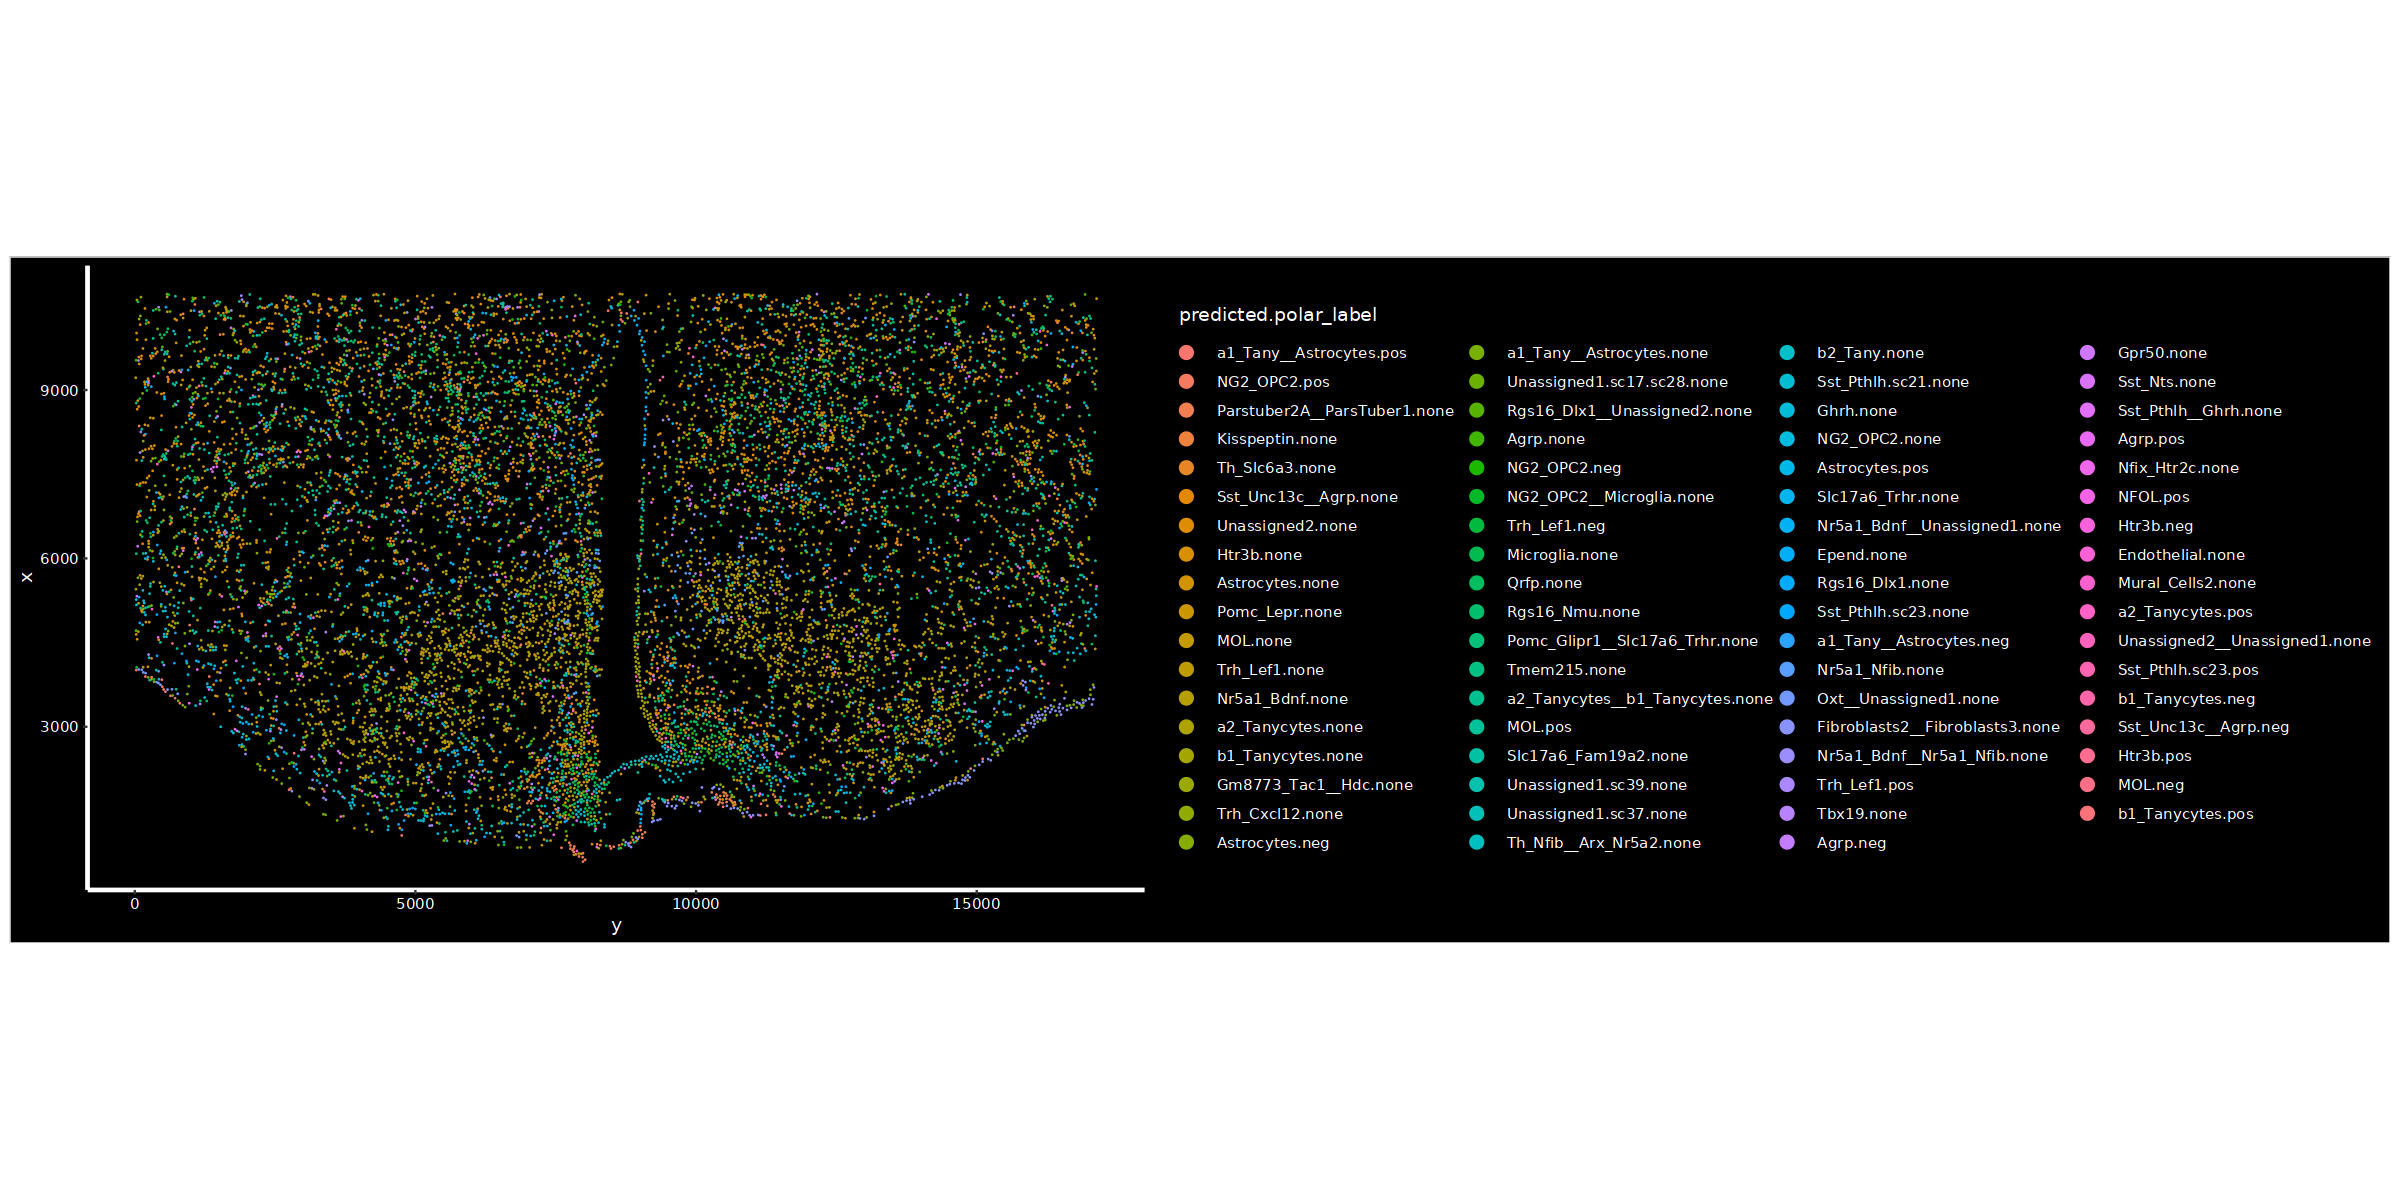

In [73]:
options(repr.plot.width=20, repr.plot.height=10)
ImageDimPlot(xenium.obj, group.by='predicted.polar_label', fov = "fov", axes = TRUE,)

In [83]:
create_grouping_col <- function(seurat_obj, prefix) {
  new_metadata <- case_when(str_detect(seurat_obj@meta.data$predicted.polar_label, prefix) ~ seurat_obj@meta.data$predicted.polar_label,
                            TRUE ~ NA_character_) %>% as.factor
  new_metadata = new_metadata %>% fct_relevel(sort(na.omit(levels(new_metadata))), after = Inf)
  return(new_metadata)
}



In [84]:
plot_celltype_idp = function(seurat_obj, cell_str, fov='fov'){
    new_grouping = seurat_obj %>%
        create_grouping_col(cell_str)
    seurat_obj = AddMetaData(seurat_obj, new_grouping, col.name = 'grouping_col')

    # Get the levels of the lab_Pomc column, including the NA_character_ level
    grouping_levels <- levels(seurat_obj@meta.data$grouping_col)
    # Generate colors using the polychrome palette
    how_many_colors = length(grouping_levels)
    colors <- Polychrome::sky.colors(how_many_colors) %>% as.character %>% `[`(1:how_many_colors) # Excluding the NA_character_ level
    # Add 'gray10' for the NA_character_ level
    colors <- c(colors, "gray10")
    # Create a named vector of colors, with levels as names
    named_colors <- setNames(colors, grouping_levels)
    # Map the lab_Pomc column values to the corresponding colors
    # color_vector <- mapvalues(xenium.obj@meta.data$lab_Pomc, from = lab_Pomc_levels, to = named_colors)
    
    ggp = ImageDimPlot(seurat_obj,
                       group.by='grouping_col',
                       boundaries = 'segmentation',
                       fov = fov,
                       border.size =0.1, 
                       border.color =NA,
                       na.value='gray20', 
                       cols=named_colors, 
                       axes = FALSE,
                       size=0)
    ggp
}

In [95]:
make_idp_pdf = function(seurat_obj, cell_type, prefix="^", suffix="\\.(neg|none|pos)", pdf_folder=""){
    cell_type_regex = cell_type %>% paste0(prefix, ., suffix)
    dir.create(pdf_folder, recursive = TRUE, showWarnings = FALSE)
    a1 = plot_celltype_idp(seurat_obj, cell_type_regex, fov='fov')  + theme(legend.position = "none")
    a2 = plot_celltype_idp(seurat_obj, cell_type_regex, fov='fov.1') + theme(legend.position = "none")
    b1 = plot_celltype_idp(seurat_obj, cell_type_regex, fov='fov.2') + theme(legend.position = "none")
    b2 = plot_celltype_idp(seurat_obj, cell_type_regex, fov='fov.3') + theme(legend.position = "none")
    c1 = plot_celltype_idp(seurat_obj, cell_type_regex, fov='fov.4') + theme(legend.position = "none")
    c2 = plot_celltype_idp(seurat_obj, cell_type_regex, fov='fov.5') + theme(legend.position = "none")
    d1 = plot_celltype_idp(seurat_obj, cell_type_regex, fov='fov.6') + theme(legend.position = "none")
    d2 = plot_celltype_idp(seurat_obj, cell_type_regex, fov='fov.7') + theme(legend.position = "none")
    title_theme <- theme(plot.title = element_text(color = "white", size = 8, hjust = 0.5))
    # Set black background theme for each plot
    legend_theme <- theme(legend.position = "bottom",
                          legend.direction = "horizontal",
                          legend.box = "horizontal",
                          legend.text = element_text(size = 4),
                          legend.key.size = unit(2, "mm"))
    # black_background_theme <- theme(plot.background = element_rect(fill = "black"),
    #                                 panel.background = element_rect(fill = "black"))
    black_background_theme <- theme(plot.background = element_rect(fill = "black", color = 'black'),
                          panel.background = element_rect(fill = "black", color = 'black'),
                          plot.margin = margin(0, 0, 0, 0),
                          panel.grid.major = element_blank(),
                          panel.grid.minor = element_blank(),
                          panel.border = element_blank())

    a1_with_title <- a1 + theme(legend.position = "right") + ggtitle("a1_Veh_PF") + title_theme + legend_theme + black_background_theme
    a2_no_legend_with_title <- a2 + guides(scale="none") + ggtitle("a2_Veh_PF") + title_theme + black_background_theme
    b1_no_legend_with_title <- b1 + guides(scale="none") + ggtitle("b1_Veh_PF") + title_theme + black_background_theme
    b2_no_legend_with_title <- b2 + guides(scale="none") + ggtitle("b2_Veh_PF") + title_theme + black_background_theme
    c1_no_legend_with_title <- c1 + guides(scale="none") + ggtitle("c1_FGF1") + title_theme + black_background_theme
    c2_no_legend_with_title <- c2 + guides(scale="none") + ggtitle("c2_FGF1") + title_theme + black_background_theme
    d1_no_legend_with_title <- d1 + guides(scale="none") + ggtitle("d1_FGF1") + title_theme + black_background_theme
    d2_no_legend_with_title <- d2 + guides(scale="none") + ggtitle("d2_FGF1") + title_theme + black_background_theme

    # Combine the plots using patchwork with a black background
    combined_plots <- a1_with_title + c1_no_legend_with_title +
                      a2_no_legend_with_title + c2_no_legend_with_title +
                      b1_no_legend_with_title + d1_no_legend_with_title +
                      b2_no_legend_with_title + d2_no_legend_with_title +
                      plot_layout(guides = "collect", ncol = 2, heights = c(1, 1, 1, 1), widths = c(1, 1))
    
    # combined_plots = combined_plots & black_background_theme & legend_theme 
    combined_plots = combined_plots + plot_annotation(title=cell_type, theme=black_background_theme) + plot_annotation(theme=legend_theme) + plot_annotation(theme=title_theme)
    # Save the combined_plots to a PDF with a black background
    pdf_name = paste0(pdf_folder, cell_type, '_ct_mapping.pdf')
    pdf(pdf_name, width = 8.27, height = 11.69, bg = "black")
    # grid.newpage()
    grid.draw(combined_plots)
    dev.off()
}

In [96]:
cell_types = xenium.obj %>% `[[` %>% 
group_by(predicted.polar_label) %>% 
summarise(n = n()) %>% 
arrange(desc(n)) %>% 
pull(predicted.polar_label) %>% 
str_replace(fixed('.none'), '') %>%
str_replace(fixed('.pos'), '') %>%
str_replace(fixed('.neg'), '') %>%
unique
cell_types

[1] "Nr5a1_Bdnf"                 "Unassigned2"               
 [3] "Astrocytes"                 "MOL"                       
 [5] "a1_Tany__Astrocytes"        "a2_Tanycytes"              
 [7] "Slc17a6_Fam19a2"            "Pomc_Lepr"                 
 [9] "Agrp"                       "Rgs16_Nmu"                 
[11] "Trh_Cxcl12"                 "NG2_OPC2"                  
[13] "Microglia"                  "Tmem215"                   
[15] "b1_Tanycytes"               "Htr3b"                     
[17] "Nr5a1_Nfib"                 "Nr5a1_Bdnf__Unassigned1"   
[19] "b2_Tany"                    "Epend"                     
[21] "Pomc_Glipr1__Slc17a6_Trhr"  "Kisspeptin"                
[23] "a2_Tanycytes__b1_Tanycytes" "Ghrh"                      
[25] "Fibroblasts2__Fibroblasts3" "NG2_OPC2__Microglia"       
[27] "Sst_Pthlh.sc21"             "Unassigned1.sc17.sc28"     
[29] "Rgs16_Dlx1__Unassigned2"    "Sst_Unc13c__Agrp"          
[31] "Sst_Pthlh.sc23"             "Qrfp"                      
[33] "Trh_Lef1"                   "Tbx19"                     
[35] "NFOL"                       "Slc17a6_Trhr"              
[37] "Rgs16_Dlx1"                 "Nr5a1_Bdnf__Nr5a1_Nfib"    
[39] "Gm8773_Tac1__Hdc"           "Nfix_Htr2c"                
[41] "Gpr50"                      "Th_Nfib__Arx_Nr5a2"        
[43] "Th_Slc6a3"                  "Sst_Nts"                   
[45] "Unassigned1.sc39"           "Parstuber2A__ParsTuber1"   
[47] "Endothelial"                "Mural_Cells2"              
[49] "Sst_Pthlh__Ghrh"            "Unassigned1.sc37"          
[51] "Oxt__Unassigned1"           "Unassigned2__Unassigned1"  
[53] "MOL__a2_Tanycytes"

In [98]:
make_idp_pdf(xenium.obj, "Tany", prefix="", suffix="", pdf_folder="ct_mapping_230710_xenium_sct_unimapped_cca/")

png 
  2

In [ ]:
for (cell_type in cell_types){
    print(cell_type)
    make_idp_pdf(xenium.obj, cell_type, pdf_folder="ct_mapping_230710_xenium_sct_unimapped_cca/")
}

[1] "Nr5a1_Bdnf"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Unassigned2"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Astrocytes"
[1] "MOL"
[1] "a1_Tany__Astrocytes"
[1] "a2_Tanycytes"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Slc17a6_Fam19a2"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Pomc_Lepr"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Agrp"
[1] "Rgs16_Nmu"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Trh_Cxcl12"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "NG2_OPC2"
[1] "Microglia"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Tmem215"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "b1_Tanycytes"
[1] "Htr3b"
[1] "Nr5a1_Nfib"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Nr5a1_Bdnf__Unassigned1"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "b2_Tany"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Epend"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Pomc_Glipr1__Slc17a6_Trhr"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”


[1] "Kisspeptin"


Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
Warning message in makePalette(n, sky):
“minimal value for n is 3, returning requested palette with 3 levels
”
